# Homework part 2 : Albacore metals

Pairs:
12
13
21
23
31
32



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

dataset_name = 'dip-har-eff.csv'
name = dataset_name.split('.csv')[0]

dataset_df = pd.read_csv("albacore_metal.csv")

# Gather info
dataset_rows = dataset_df.shape[0]

dataset_df = dataset_df.values
dataset_df = dataset_df[np.arange(0, dataset_rows), :]

dataset_X = dataset_df[:,2]
dataset_Y = dataset_df[:,3]
dataset_X_max = np.max(dataset_X)
dataset_Y_max = np.max(dataset_Y)

dataset_X = np.true_divide(dataset_X, dataset_X_max)
dataset_Y = np.true_divide(dataset_Y, dataset_Y_max)


In [80]:
# Functions
def calc_total_Error(row, col):
    return (b1*row+b0 - col)**2

def calc_b0_Error(row, col):
    return (b1*row+b0 - col)

def calc_b1_Error(row, col):
    return (b1*row+b0 - col) * row

# helper wrapper function for us to plug in error function to use
def useErrorFunction(errorFunction, args):
    return errorFunction(*args)
    
def mse(X,Y, errorFunction):
    errorsList = []
    for (row, col) in zip(X,Y):
        val = useErrorFunction(errorFunction, (row, col))
        errorsList.append(val)
    ERROR_MSE = calcMean(errorsList)  
    return ERROR_MSE

def adjustWeight(weight, learn, temp_error):
    return weight - learn * temp_error

def takeRandomBatch(listLen, batchSize):
    return random.sample(range(listLen), batchSize)

# Related to R Squared Error Loss
def calc_predicted(b0, b1, data):
    predicted_vals = [b1*x + b0 for x in data]
    return predicted_vals

def calcMean(results):
    results_sum = sum(results)
    return results_sum / batchSize

# sum(y - mean)^2 OR sum(y hat - mean)^2
def calcSquareDiff(data):
    mean = calcMean(list(data))
    mean_diff = [actual - mean for actual in data]
    squared_mean_diff = [val**2 for val in mean_diff]
    sum_square_mean_diff = sum(squared_mean_diff)
    return sum_square_mean_diff

# sum(y hat - mean)^2 / sum(y - mean)^2
def calcRSquared(actual, predicted):
    predicted_R_square = calcSquareDiff(predicted)
    actual_R_square = calcSquareDiff(actual)
    print('predicted_R_square')
    print(predicted_R_square)
    print('actual_R_square')
    print(actual_R_square)
    print('RSquare Value: ')
    return predicted_R_square / actual_R_square

 b0: -0.487000729868 b1: 0.998665243549 Error: 0.450597124616
 b0: -0.476450727992 b1: 0.99596165246 Error: 0.442623215602
 b0: -0.467705710287 b1: 0.992265774538 Error: 0.436928247105
 b0: -0.460292731198 b1: 0.987853899891 Error: 0.432611049424
 b0: -0.453864605031 b1: 0.982928731876 Error: 0.429149867687
 b0: -0.448166452001 b1: 0.977638963099 Error: 0.426236743109
 b0: -0.443011143622 b1: 0.97209364386 Error: 0.423685849151
 b0: -0.438261280036 b1: 0.966372728323 Error: 0.421382302659
 b0: -0.433815961703 b1: 0.960534815227 Error: 0.419253249191
 b0: -0.429601080035 b1: 0.954622829421 Error: 0.417251295557
 b0: -0.425562190896 b1: 0.948668192014 Error: 0.415344851461
 b0: -0.421659283872 b1: 0.942693881177 Error: 0.413512383798
 b0: -0.417862943007 b1: 0.936716678724 Error: 0.411738919856
 b0: -0.414151528839 b1: 0.930748819051 Error: 0.410013866478
 b0: -0.410509110072 b1: 0.924799199433 Error: 0.408329615446
 b0: -0.406923945447 b1: 0.918874268346 Error: 0.406680629609
 b0: -0.40

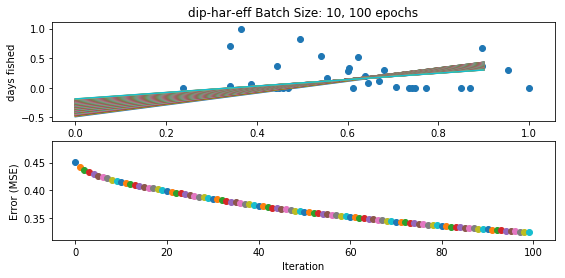

In [82]:
# Start of Regression

# init weights
b1 = 1.0
b0 = -0.5
batchSize = 10
epochs = 100

learn = 0.2

plt.figure(figsize=(9,4))

plt.subplot(211)

plt.xlabel('days fished')
plt.ylabel('days fished')
plt.title(name + ' Batch Size: ' + str(batchSize) + ', ' + str(epochs) + ' epochs')
plt.scatter(dataset_X, dataset_Y)
plt.pause(0.1);

batchSample = takeRandomBatch(len(dataset_X), batchSize)
sample_X = [dataset_X[i] for i in sorted(batchSample)]
sample_Y = [dataset_Y[i] for i in sorted(batchSample)]

batch_epoch_ERRORS = []
for i in range(epochs):
    ERROR = mse(dataset_X, dataset_Y, calc_total_Error)
    batch_epoch_ERRORS.append(ERROR)
    b0_temp_error = mse(sample_X, sample_Y, calc_b0_Error)
    b1_temp_error = mse(sample_X, sample_Y, calc_b1_Error)
    b0 = adjustWeight(b0, learn, b0_temp_error)
    b1 = adjustWeight(b1, learn, b1_temp_error)
    print(" b0: " + str(b0) + " b1: " + str(b1) + " Error: " + str(ERROR))
    # How to plot the graph
    X_test = np.arange(0,1,0.1)
    plt.plot (X_test, b1*X_test + b0)
    plt.pause(0.1)

# Error Analysis with R Squared
X_max = np.max(dataset_X).item()
random_testing_vals = [random.uniform(0.0, X_max) for _ in range(5)]
predicted = calc_predicted(b0,b1,random_testing_vals)
print('---------------------------- RSQUARED FOR MODEL PREDICTION ----------------------------------')
print('Tested Values for ' + str(b1) + 'x + ' + str(b0) + ': ')
print('Random X values: ')
print(list(random_testing_vals))

print('Y values based on model: ')
print(list(predicted))

# Calculate R Squared
print(calcRSquared(sample_Y, list(predicted)))   

plt.subplot(212)
plt.xlabel('Iteration')
plt.ylabel('Error (MSE)')

# Plot for error loss
for count, value in enumerate(batch_epoch_ERRORS):
    plt.scatter(count,value)

plt.show()